<img src="../gfx/lpqc_title.jpg" alt="Title" style="display: block; margin: auto; width: 100%;" />

# 🐓 Analyse exploratoire

**"La Poule Qui Chante"** 🐓, une entreprise française d'agroalimentaire dont l'activité principale est l'élevage et la vente de poulets sous le label "Poulet Agriculture Biologique", souhaite se développer à l'international.

L'objectif de cette étude est de proposer une **analyse des groupements de pays cibles pour l'export du poulet**.

<img src="../gfx/sep.jpg" alt="Barre">

## Etape 1 - Importation des librairies et chargement des données

***

### 1.1 - Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("colorblind")
sns.set_theme(style="darkgrid")


Variables retenues :

- Population (Source : FAO)
- Production volaille (Source : FAO)
- Consommation volaille (Source : FAO)
- Importations volaille (Source : FAO)
- Exportations volaille (Source : FAO)
- Stabilité politique (Source : FAO)
- Inflation (Source : La Banque Mondiale)
- PIB par habitant PPA (Source : La Banque Mondiale)
- Implantation des restaurants KFC (Source : Wikipedia)
- Distances en tranport maritime entre les pays

### 1.2 - Chargement des données Pays ISO

Afin d'être sûr de traiter les bons pays, nous allons utiliser les standards ***ISO 3166-1 alpha-3, et M49*** pour les codes pays.

In [2]:
# Importation du fichier PaysISO.csv
df_pays = pd.read_csv("../data/PaysISO.csv")
df_pays.head()

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,...,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR,wikidata_id
0,AFG,93,AFG,af,Yes,4,1.0,AF,AF,AF,...,Афганистан,World,Kabul,AS,.af,"fa-AF,ps,uz-AF,tk",1149361,Afghanistan,B2,https://www.wikidata.org/wiki/Q889
1,AIA,1-264,AIA,am,Territory of GB,660,9.0,AV,NaN,AI,...,Ангилья,World,The Valley,NaN,.ai,en-AI,3573511,Anguilla,1A,https://www.wikidata.org/wiki/Q25228
2,ALB,355,ALB,aa,Yes,8,3.0,AL,AB,AL,...,Албания,World,Tirana,EU,.al,"sq,el",783754,Albania,B3,https://www.wikidata.org/wiki/Q222
3,ALD,358,ALA,NaN,Part of FI,248,1242.0,NaN,NaN,AX,...,Аландских островов,World,Mariehamn,EU,.ax,sv-AX,661882,Kepulauan Aland,NaN,https://www.wikidata.org/wiki/Q5689
4,ALG,213,DZA,ae,Yes,12,4.0,AG,AL,DZ,...,Алжир,World,Algiers,AF,.dz,ar-DZ,2589581,Algeria,B4,https://www.wikidata.org/wiki/Q262


In [3]:
# Suppression des colonnes inutiles
df_pays.drop(columns=['FIFA', 'Dial', 'MARC', 'is_independent', 'ISO3166-1-numeric', 'GAUL', 'UNTERM English Short',
                      'FIPS', 'WMO', 'ISO3166-1-Alpha-2', 'ITU', 'IOC', 'DS', 'UNTERM Spanish Formal',
                      'Global Code', 'Intermediate Region Code', 'UNTERM French Short', 'ISO4217-currency_name',
                      'UNTERM Russian Formal', 'UNTERM English Formal', 'ISO4217-currency_alphabetic_code',
                      'Small Island Developing States (SIDS)', 'UNTERM Spanish Short', 'ISO4217-currency_numeric_code',
                      'UNTERM Chinese Short', 'UNTERM French Formal', 'UNTERM Russian Short', 'official_name_ar',
                      'ISO4217-currency_minor_unit', 'UNTERM Arabic Formal', 'UNTERM Chinese Formal',
                      'Land Locked Developing Countries (LLDC)', 'Intermediate Region Name', 'official_name_es',
                      'UNTERM English Formal', 'official_name_cn', 'ISO4217-currency_country_name',
                      'Least Developed Countries (LDC)', 'UNTERM Arabic Short', 'official_name_ru', 'Global Name',
                      'Capital', 'Continent', 'TLD', 'Languages', 'Geoname ID', 'CLDR display name',
                      'EDGAR', 'wikidata_id', 'Sub-region Code', 'Region Code'], inplace=True)
df_pays.head()

,ISO3166-1-Alpha-3,official_name_fr,M49,official_name_en,Region Name,Sub-region Name
0,AFG,Afghanistan,4,Afghanistan,Asia,Southern Asia
1,AIA,Anguilla,660,Anguilla,Americas,Latin America and the Caribbean
2,ALB,Albanie,8,Albania,Europe,Southern Europe
3,ALA,Îles d’Åland,248,Åland Islands,Europe,Northern Europe
4,DZA,Algérie,12,Algeria,Africa,Northern Africa


In [4]:
df_pays.rename(columns={'ISO3166-1-Alpha-3': 'ISO', 'official_name_fr': 'Pays', 'official_name_en': 'Countries',
                        'Region Name': 'Region', 'Sub-region Name': 'Sub-region'}, inplace=True)
df_pays.head()

,ISO,Pays,M49,Countries,Region,Sub-region
0,AFG,Afghanistan,4,Afghanistan,Asia,Southern Asia
1,AIA,Anguilla,660,Anguilla,Americas,Latin America and the Caribbean
2,ALB,Albanie,8,Albania,Europe,Southern Europe
3,ALA,Îles d’Åland,248,Åland Islands,Europe,Northern Europe
4,DZA,Algérie,12,Algeria,Africa,Northern Africa


### 1.3 - Chargement des données Population (Source : FAO)

In [5]:
# Importation du fichier Population_2000_2018.csv
df_population = pd.read_csv("../data/Population_2000_2018.csv", sep=';')
# Afficher les dimmensions du dataset
print("Le dataframe Population comporte {} observation(s) et {} colonne(s).".format(df_population.shape[0], df_population.shape[1]))

Le dataframe Population comporte 4411 observation(s) et 15 colonne(s).


In [6]:
df_population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [7]:
# Suppression des colonnes inutiles
df_population.drop(columns=['Code Domaine', 'Code zone', 'Domaine', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Unité', 'Symbole', 'Description du Symbole', 'Note'], inplace=True)
# Modification des noms de colonnes
df_population.rename(columns={'Valeur': 'Population', 'Zone': 'Pays'}, inplace=True)
# Correction de l'unité de la population
df_population['Population'] = df_population['Population'] * 1000

In [8]:
# Récupérer la valeur la plus actuelle
df_population = df_population.loc[df_population.groupby('Pays').Année.idxmax()]
# Suppression de la colonne Année
df_population.drop(columns=['Année'], inplace=True)
# Reset de l'index
df_population.reset_index(drop=True, inplace=True)

In [9]:
df_population.head()

,Pays,Population
0,Afghanistan,37171921.0
1,Afrique du Sud,57792518.0
2,Albanie,2882740.0
3,Algérie,42228408.0
4,Allemagne,83124418.0


### 1.4 - Chargement des données Bilan Alimentaire (Source : FAO)

In [10]:
# Importation du fichier BilanAlimentaire.csv
df_bilanalim = pd.read_csv("../data/BilanAlimentaire.csv")
# Afficher les dimmensions du dataset
print("Le dataframe Bilan Alimentaire comporte {} observation(s) et {} colonne(s).".format(df_bilanalim.shape[0], df_bilanalim.shape[1]))

Le dataframe Bilan Alimentaire comporte 9030 observation(s) et 15 colonne(s).


In [11]:
df_bilanalim.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (FBS),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2010,2010,1000 t,28,I,Valeur imputée,NaN
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5611,Importations - quantité,S2734,Viande de Volailles,2010,2010,1000 t,39,I,Valeur imputée,NaN
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5142,Nourriture,S2734,Viande de Volailles,2010,2010,1000 t,65,I,Valeur imputée,NaN
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5511,Production,S2734,Viande de Volailles,2011,2011,1000 t,26,I,Valeur imputée,NaN
4,FBS,Bilans Alimentaires (2010-),4,Afghanistan,5611,Importations - quantité,S2734,Viande de Volailles,2011,2011,1000 t,51,I,Valeur imputée,NaN


In [12]:
# Suppression des colonnes inutiles
df_bilanalim.drop(columns=['Code Domaine', 'Domaine', 'Zone', 'Code Élément', 'Code Produit (FBS)', 'Produit', 'Code année', 'Unité', 'Symbole', 'Description du Symbole', 'Note'], inplace=True)
# Modification des noms de colonnes
df_bilanalim.rename(columns={'Code zone (M49)': 'M49'}, inplace=True)
# Correction de l'unité des valeurs
df_bilanalim['Valeur'] = df_bilanalim['Valeur'] * 1000

In [13]:
# Récupérer la valeur la plus actuelle
df_bilanalim = df_bilanalim.loc[df_bilanalim.groupby(by=['M49', 'Élément']).Année.idxmax()]
# Suppression de la colonne Année
df_bilanalim.drop(columns=['Année'], inplace=True)
# Pivot
df_bilanalim = df_bilanalim.pivot(index='M49', columns='Élément', values='Valeur')
# Renommer les colonnes
df_bilanalim.rename(columns={"Exportations - quantité": "Exportations", "Importations - quantité": "Importations", "Nourriture" : "Consommation"}, inplace=True)
# Reset de l'index
df_bilanalim.reset_index(inplace=True)

In [14]:
df_bilanalim.head()

Élément,M49,Exportations,Importations,Consommation,Production
0,4,0.0,7000.0,36000.0,29000.0
1,8,0.0,47000.0,64000.0,18000.0
2,12,0.0,0.0,275000.0,275000.0
3,24,0.0,316000.0,374000.0,59000.0
4,28,0.0,7000.0,6000.0,0.0


Il s'agit de données concernant la volaille, exprimées en tonnes.

### 1.5 - Chargement des données Stabilité Politique (Source : FAO)

In [15]:
# Importation du fichier StabilitePolitique.csv
df_stabilite = pd.read_csv("../data/StabilitePolitique.csv")
# Afficher les dimmensions du dataset
print("Le dataframe Stabilité Politique comporte {} observation(s) et {} colonne(s).".format(df_stabilite.shape[0], df_stabilite.shape[1]))

Le dataframe Stabilité Politique comporte 4270 observation(s) et 15 colonne(s).


In [16]:
df_stabilite.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2000,2000,NaN,-2.44,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2002,2002,NaN,-2.04,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2003,2003,NaN,-2.20,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2004,2004,NaN,-2.30,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2005,2005,NaN,-2.07,X,Ciffre de sources internationales,NaN


In [17]:
# Suppression des colonnes inutiles
df_stabilite.drop(columns=['Code Domaine', 'Domaine', 'Zone', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Unité', 'Symbole', 'Description du Symbole', 'Note'], inplace=True)
# Modification des noms de colonnes
df_stabilite.rename(columns={'Code zone (M49)': 'M49', 'Valeur': 'Stabilité Politique'}, inplace=True)

In [18]:
# Récupérer la valeur la plus actuelle
df_stabilite = df_stabilite.loc[df_stabilite.groupby('M49').Année.idxmax()]
# Suppression de la colonne Année
df_stabilite.drop(columns=['Année'], inplace=True)
# Reset de l'index
df_stabilite.reset_index(drop=True, inplace=True)

In [19]:
df_stabilite.head()

,M49,Stabilité Politique
0,4,-2.55
1,8,0.11
2,12,-0.74
3,16,1.13
4,20,1.59


### 1.6 - Chargement des données Inflation (Source : La Banque Mondiale)

In [20]:
# Importation du fichier Inflation.csv
df_inflation = pd.read_csv("../data/Inflation.csv", sep=';')
# Afficher les dimmensions du dataset
print("Le dataframe Inflation comporte {} observation(s) et {} colonne(s).".format(df_inflation.shape[0], df_inflation.shape[1]))

Le dataframe Inflation comporte 266 observation(s) et 15 colonne(s).


In [21]:
df_inflation.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,2.078141,4.316297,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN,NaN
1,NaN,5.537538,8.971206,9.158708,5.750981,5.370290,5.245878,6.571396,6.399343,4.720805,4.653665,5.405162,7.240978,10.773751,7.126975
2,Afghanistan,2.178538,11.804186,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN,NaN
3,NaN,1.784844,4.018699,4.578375,2.439201,1.768436,2.130817,1.487416,1.725486,1.784050,1.983092,2.490378,3.745700,7.949251,4.953050
4,Angola,14.469656,13.482468,10.277905,8.777814,7.280387,9.355972,30.694415,29.844480,19.628938,17.080954,22.271539,25.754295,21.355290,13.644102


In [22]:
# Renommer les colonnes
df_inflation.rename(columns={"Country Name": "Pays"}, inplace=True)
# Suppression des pays vides
df_inflation.dropna(subset=['Pays'], inplace=True)

In [23]:
# Pivot
df_inflation = pd.melt(df_inflation, id_vars=['Pays'])
# Changer le type de la colonne Année
df_inflation['variable'] = df_inflation['variable'].astype(str).astype(int)

In [24]:
# Suppression des Na sur valeur
df_inflation.dropna(subset=['value'], inplace=True)

In [25]:
# Récupérer la valeur la plus actuelle
df_inflation = df_inflation.loc[df_inflation.groupby('Pays').variable.idxmax()]

In [26]:
# Suppression de la colonne Année
df_inflation.drop(columns=['variable'], inplace=True)
# Renommer la colonne valeur
df_inflation.rename(columns={"value": "Inflation"}, inplace=True)
# Reset de l'index
df_inflation.reset_index(drop=True, inplace=True)

In [27]:
df_inflation.head()

,Pays,Inflation
0,Afghanistan,2.302373
1,Afrique du Nord et Moyen-Orient,4.225352
2,Afrique du Nord et Moyen-Orient (BIRD et IDA),7.706658
3,Afrique du Nord et Moyen-Orient (hors revenu é...,6.091142
4,Afrique du Sud,6.073909


### 1.7 - Chargement des données PIB par Habitant PPA (Source : La Banque Mondiale)

In [28]:
# Importation du fichier PIBHabitantPPA.csv
df_pib = pd.read_csv("../data/PIBHabitantPPA.csv", sep=';')
# Afficher les dimmensions du dataset
print("Le dataframe PIB comporte {} observation(s) et {} colonne(s).".format(df_pib.shape[0], df_pib.shape[1]))

Le dataframe PIB comporte 266 observation(s) et 15 colonne(s).


In [29]:
df_pib.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,33729.511910,35324.072064,34095.647171,35901.653313,35657.287197,35972.866445,36117.508211,37524.928478,39287.019517,39110.276190,28976.463550,35696.309372,41649.450792,44967.344513
1,NaN,3149.019598,3253.723505,3171.570276,3290.844300,3426.575818,3456.365448,3551.069323,3703.886605,3648.310911,3742.848955,3629.508004,3907.951637,4229.682100,4374.229532
2,Afghanistan,1765.538028,1744.060623,1988.429304,2133.241271,2224.490748,2284.075848,2213.181441,2335.795862,2432.276701,2583.485332,2561.981761,2144.166570,2122.995815,2211.280635
3,NaN,3477.319749,3620.649511,3735.925373,3899.645897,4103.765604,4052.733797,3996.864267,4063.185050,4198.081042,4454.156038,4441.937338,4698.926894,5107.272939,5343.468529
4,Angola,6607.022197,6711.390257,7354.942966,7561.039205,7990.274457,7119.726443,6843.735897,6992.728834,7347.799936,7528.382418,6450.749946,7408.126591,7924.888806,8040.702450


In [30]:
# Rennommer les colonnes
df_pib.rename(columns={"Country Name": "Pays"}, inplace=True)
# Suppression des pays vides
df_pib.dropna(subset=['Pays'], inplace=True)

In [31]:
# Pivot
df_pib = pd.melt(df_pib, id_vars=['Pays'])
# Changer le type de la colonne Année
df_pib['variable'] = df_pib['variable'].astype(str).astype(int)
# Suppression des Na sur valeur
df_pib.dropna(subset=['value'], inplace=True)

In [32]:
# Récupérer la valeur la plus actuelle
df_pib = df_pib.loc[df_pib.groupby('Pays').variable.idxmax()]
# Suppression de la colonne Année
df_pib.drop(columns=['variable'], inplace=True)
# Renommer la colonne valeur
df_pib.rename(columns={"value": "Activité économique"}, inplace=True)
# Reset de l'index
df_pib.reset_index(drop=True, inplace=True)

In [33]:
df_pib.head()

,Pays,Activité économique
0,Afghanistan,2211.280635
1,Afrique du Nord et Moyen-Orient,20563.877642
2,Afrique du Nord et Moyen-Orient (BIRD et IDA),14171.919357
3,Afrique du Nord et Moyen-Orient (hors revenu é...,14072.765027
4,Afrique du Sud,15194.199176


### 1.8 - Chargement des données Restaurants KFC

In [34]:
# Importation du fichier RestaurantsKFC.csv
df_kfc = pd.read_csv("../data/RestaurantsKFC.csv", sep=';')
df_kfc.head()

,Pays,ISO,Restaurants_KFC
0,Chine,CHN,7980
1,États-Unis,USA,4062
2,Japon,JPN,1131
3,Afrique du Sud,ZAF,955
4,Royaume-Uni,GBR,909


In [35]:
df_kfc.drop(columns=['Pays'], inplace=True)
df_kfc.rename(columns={'Restaurants_KFC': 'KFC'}, inplace=True)
df_kfc.head()

,ISO,KFC
0,CHN,7980
1,USA,4062
2,JPN,1131
3,ZAF,955
4,GBR,909


### 1.9 - Chargement des données de Transport maritime

In [36]:
# Importation du fichier TransportMaritime.csv
df_transport = pd.read_csv("../data/TransportMaritime.csv", sep=';')
df_transport.head()

,iso1,iso2,seadistance,capitalport1,capitalport2,roaddistance,short
0,ABW,AFG,16499,NaN,1471.0,NaN,0
1,ABW,AGO,9437,NaN,1184.0,NaN,0
2,ABW,AIA,957,NaN,NaN,NaN,0
3,ABW,ALB,8790,NaN,248.0,NaN,0
4,ABW,AND,7685,NaN,453.0,NaN,0


In [37]:
df_transport = df_transport.loc[df_transport['iso1'] == 'FRA']

In [38]:
df_transport.drop(columns=['iso1', 'capitalport1', 'capitalport2', 'roaddistance', 'short'], inplace=True)
df_transport.rename(columns={'iso2': 'ISO', 'seadistance': 'Distance'}, inplace=True)
df_transport.head()

,ISO,Distance
14916,ABW,7685
14917,AFG,7725
14918,AGO,8723
14919,AIA,6785
14920,ALB,1398


### 1.10 - Chargement des données de Revenu National Brut par habitant, méthode Atlas, en $US courants (source : Banque Mondiale)

In [39]:
# Importation du ficher RevenuNationBrut.csv
df_revenu = pd.read_csv("../data/RevenuNationalBrut.csv", sep=';')
df_revenu.head()

,Pays,ISO,Revenu
0,Aruba,ABW,30590.000000
1,NaN,AFE,1534.027144
2,Afghanistan,AFG,370.000000
3,NaN,AFW,1771.570654
4,Angola,AGO,1870.000000


In [40]:
df_revenu.drop(columns=['Pays'], inplace=True)
df_revenu['Revenu'] = round(df_revenu['Revenu'])
df_revenu.head()

,ISO,Revenu
0,ABW,30590.0
1,AFE,1534.0
2,AFG,370.0
3,AFW,1772.0
4,AGO,1870.0


<img src="../gfx/sep.jpg" alt="Barre">

## Etape 2 - Fusion des dataframes

***

In [41]:
df_merge = df_pays.merge(df_population, on='Pays', how='inner')

In [42]:
df_merge = df_merge.merge(df_bilanalim, how='inner', on='M49')
df_merge = df_merge.merge(df_stabilite, how='inner', on='M49')
df_merge = df_merge.merge(df_inflation, how='inner', on='Pays')
df_merge = df_merge.merge(df_pib, how='inner', on='Pays')
df_merge = df_merge.merge(df_revenu, how='inner', on='ISO')

In [43]:
df_merge = df_merge.merge(df_kfc, how='left', on='ISO')

In [44]:
df_merge = df_merge.merge(df_transport, how='left', on='ISO')

In [45]:
# Remplacement des Na par 0.0 dans les colonnes Exportations/Importations/Consommation/Production
df_merge['Exportations'] = df_merge['Exportations'].fillna(0)
df_merge['Importations'] = df_merge['Importations'].fillna(0)
df_merge['Consommation'] = df_merge['Consommation'].fillna(0)
df_merge['Production'] = df_merge['Production'].fillna(0)
df_merge['KFC'] = df_merge['KFC'].fillna(0)

In [46]:
# Extraire les données de la France comme référence
df_france = df_merge.loc[df_merge['ISO'] == 'FRA']
df_france.head()

,ISO,Pays,M49,Countries,Region,Sub-region,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
52,FRA,France,250,France,Europe,Western Europe,64990511.0,400000.0,667000.0,1590000.0,1478000.0,0.33,4.878357,61473.303082,45180.0,363.0,NaN


In [47]:
# Supprimer la France
df_merge = df_merge[df_merge.Pays != 'France']

In [48]:
# Suppression des Na restants
df_merge.dropna(inplace=True)

In [49]:
# Suppression des colonnes inutiles pour l'analyse
df_merge.drop(columns=['ISO', 'M49', 'Countries'], inplace=True)
df_merge.head()

,Pays,Region,Sub-region,Population,Exportations,Importations,Consommation,Production,Stabilité Politique,Inflation,Activité économique,Revenu,KFC,Distance
0,Afghanistan,Asia,Southern Asia,37171921.0,0.0,7000.0,36000.0,29000.0,-2.55,2.302373,2211.280635,370.0,0.0,7725.0
1,Albanie,Europe,Southern Europe,2882740.0,0.0,47000.0,64000.0,18000.0,0.11,4.759764,21925.608377,6820.0,8.0,1398.0
2,Algérie,Africa,Northern Africa,42228408.0,0.0,0.0,275000.0,275000.0,-0.74,9.322174,16824.487903,4430.0,2.0,865.0
3,Angola,Africa,Sub-Saharan Africa,30809787.0,0.0,316000.0,374000.0,59000.0,-0.65,13.644102,8040.702450,1870.0,9.0,8723.0
4,Argentine,Americas,Latin America and the Caribbean,44361150.0,182000.0,14000.0,2193000.0,2361000.0,-0.01,94.800000,30082.304525,11820.0,0.0,13197.0


In [50]:
print("Le dataframe intermédiaire comporte {} pays, avec une population de {} milliards d'humain, soit {}% de la population mondiale.".format(df_merge['Pays'].count(), round(df_merge['Population'].sum()/1e9), round((df_merge['Population'].sum()/8e9)*100)))

Le dataframe intermédiaire comporte 169 pays, avec une population de 5 milliards d'humain, soit 67% de la population mondiale.


<img src="../gfx/sep.jpg" alt="Barre">

## Etape 3 - Sélection des pays

***

### 3.1 - Analyse de Population

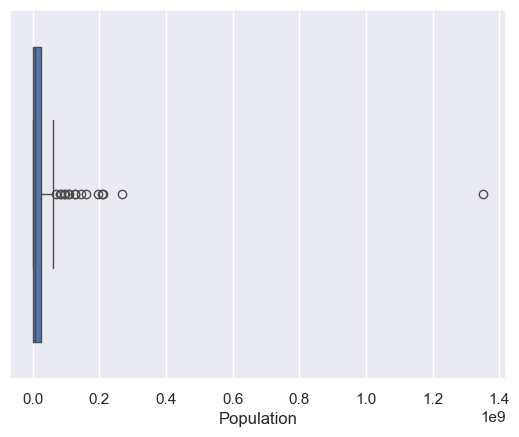

In [51]:
# Distribution de la population
sns.boxplot(x=df_merge['Population'])
plt.show()

In [52]:
# Tri des pays par population
df_merge.sort_values(by='Population', ascending=False, inplace=True)
df_merge[['Pays', 'Population']].head()

,Pays,Population
69,Inde,1.352642e+09
68,Indonésie,2.676705e+08
120,Pakistan,2.122283e+08
23,Brésil,2.094693e+08
114,Nigéria,1.958747e+08


L'Inde avec sa population de 1,4 milliard d'individus est un outlier évident que nous pouvons retirer de la sélection.

In [53]:
# Suppression de l'Inde
df_merge = df_merge[df_merge.Pays != 'Inde']

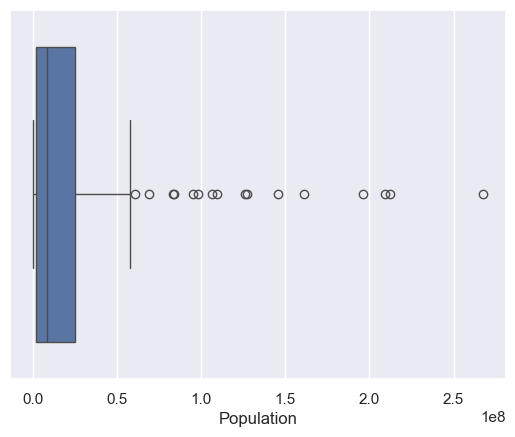

In [54]:
sns.boxplot(x=df_merge['Population'])
plt.show()

### 3.2 - Analyse de Production

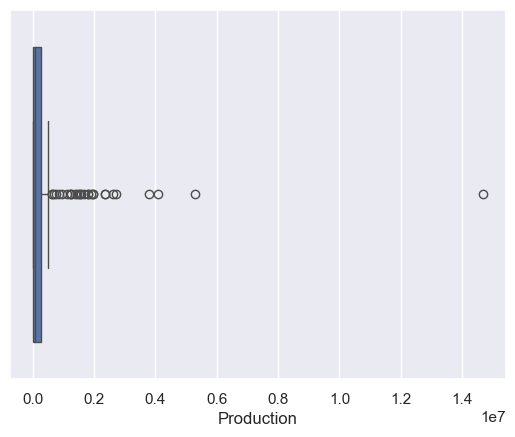

In [55]:
# Distribution de la production
sns.boxplot(x=df_merge['Production'])
plt.show()

In [56]:
# Tri des pays par production
df_merge.sort_values(by='Production', ascending=False, inplace=True)
df_merge[['Pays', 'Production']].head()

,Pays,Production
23,Brésil,14691000.0
131,Fédération de Russie,5308000.0
68,Indonésie,4083000.0
99,Mexique,3800000.0
126,Pologne,2734000.0


De la même façon, le Brésil est un outlier évident quand il s'agit de la production de volaille, avec 14 millions de tonnes-équivalent carcasse de production annuelle.

In [57]:
# Suppression du Brésil
df_merge = df_merge[df_merge.Pays != 'Brésil']

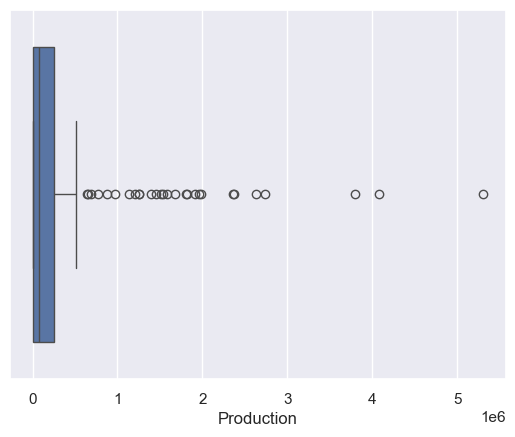

In [58]:
sns.boxplot(x=df_merge['Production'])
plt.show()

### 3.3 - Analyse de Revenu

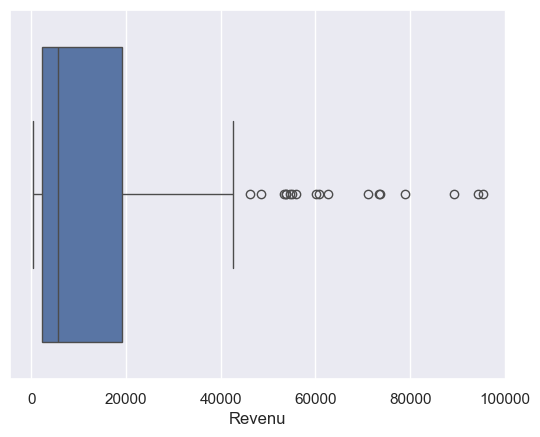

In [59]:
# Distribution des revenus
sns.boxplot(x=df_merge['Revenu'])
plt.show()

Le revenu national brut par habitant de la France étant à 45000 $US, nous décidons de retirer les pays avec un RNB inférieur à 2500$US. Le revenu des habitants de ces pays ne leur permet pas d'être acheteur de nos poulets.

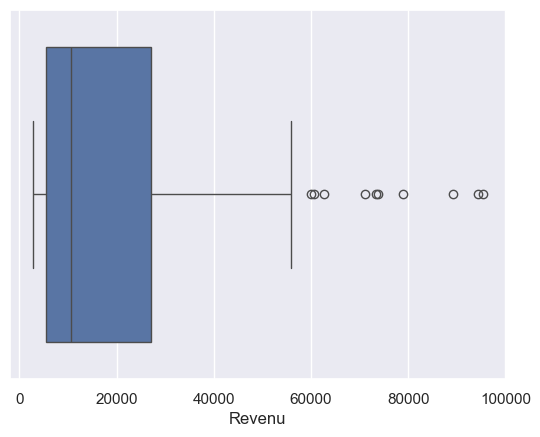

In [60]:
# Suppression des pays avec un revenu inférieur à 2500
df_merge = df_merge[df_merge.Revenu > 2500]
sns.boxplot(x=df_merge['Revenu'])
plt.show()

<img src="../gfx/sep.jpg" alt="Barre">

## Etape 4 - Export du dataframe

***

In [61]:
df_merge.to_csv('../data/df_merge.csv', index=False)
print("Le dataframe final comporte {} pays, avec une population de {} milliards d'humain, soit {}% de la population mondiale.".format(df_merge['Pays'].count(), round(df_merge['Population'].sum()/1e9), round((df_merge['Population'].sum()/8e9)*100)))

Le dataframe final comporte 118 pays, avec une population de 2 milliards d'humain, soit 30% de la population mondiale.
